In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('word_errors.csv')

In [3]:
df = df.sort_values('Count', ascending=False)
df

,Label,Count
21,313EB,67
41,5E84,58
18,522B,49
47,7DA0,48
79,F0832,46
...,...,...
352,5FC3,1
34,516D,1
354,51AC,1
186,6599,1


In [4]:
df.describe()

,Count
count,389.000000
mean,9.508997
std,9.702696
min,1.000000
25%,3.000000
50%,7.000000
75%,12.000000
max,67.000000


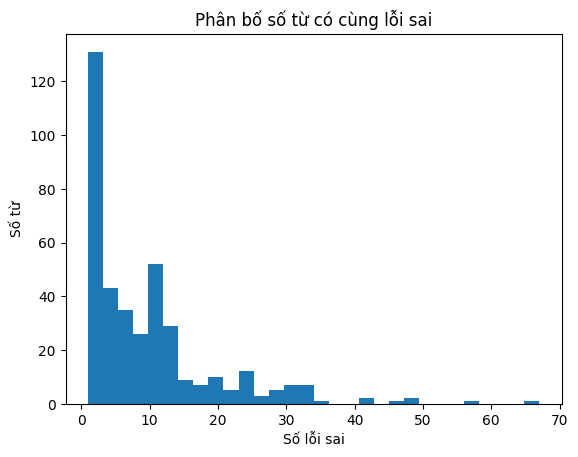

In [5]:
df.Count.plot(kind='hist', bins=30)

plt.xlabel("Số lỗi sai")
plt.ylabel("Số từ")
plt.title("Phân bố số từ có cùng lỗi sai")

# plt.show()
plt.savefig("word_error_nom_histogram.png", dpi=300)

In [6]:
df_all = df.Label.values
df_25 = df[df.Count >= df.Count.quantile(0.25)].Label.values
df_50 = df[df.Count >= df.Count.quantile(0.50)].Label.values
df_75 = df[df.Count >= df.Count.quantile(0.75)].Label.values
df_mean = df[df.Count >= df.Count.mean()].Label.values

In [7]:
with open('NOM_CGGAN_train.txt') as f:
    lines = f.read().splitlines()
len(lines)

24165

In [8]:
data_all = [line for line in lines if line.split('\t')[1] in df_all]
data_25 = [line for line in lines if line.split('\t')[1] in df_25]
data_50 = [line for line in lines if line.split('\t')[1] in df_50]
data_mean = [line for line in lines if line.split('\t')[1] in df_mean]
data_75 = [line for line in lines if line.split('\t')[1] in df_75]

In [9]:
with open('NOM_CGGAN_errors_all.txt', 'w') as f:
    f.write('\n'.join(data_all).rstrip())

In [10]:
with open('NOM_CGGAN_errors_Q1.txt', 'w') as f:
    f.write('\n'.join(data_25).rstrip())

In [11]:
with open('NOM_CGGAN_errors_Q2.txt', 'w') as f:
    f.write('\n'.join(data_50).rstrip())

In [12]:
with open('NOM_CGGAN_errors_mean.txt', 'w') as f:
    f.write('\n'.join(data_mean).rstrip())

In [13]:
with open('NOM_CGGAN_errors_Q3.txt', 'w') as f:
    f.write('\n'.join(data_75).rstrip())

In [1]:
import wandb
import os
import pickle
from tqdm import tqdm

os.environ['WANDB_API_KEY'] = '41b0abfcc690d5e88d908912bdd809e22b294be0'

In [12]:
with open('histories/vgg16_gan_errors_mean_10_02.pkl', 'rb') as file:
    histories = pickle.load(file)

for history in tqdm(histories):
    wandb.init(project="NomOCR_TPU", name="VGG16 | CGGAN | ERROR | MEAN")
    acc = history['sparse_categorical_accuracy']
    val_acc = history['val_sparse_categorical_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    
    for i in range(len(acc)):
        wandb.log({
            'sparse_categorical_accuracy': acc[i],
            'val_sparse_categorical_accuracy': val_acc[i],
            'loss': loss[i],
            'val_loss': val_loss[i],
        })
    wandb.log({'best_val_sparse_categorical_accuracy': max(val_acc)})
    wandb.finish()

  0%|                                                                                                                      | 0/10 [00:00<?, ?it/s]

best_val_sparse_categorical_accuracy,▁
loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sparse_categorical_accuracy,▁▆▇█████████████████████████████████████
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_sparse_categorical_accuracy,▁▆▇▇█▇▇███▇▇▇███████████████████████████
best_val_sparse_categorical_accuracy,0.93225
loss,0.01859
sparse_categorical_accuracy,0.99543
val_loss,0.94705
val_sparse_categorical_accuracy,0.88349


 10%|███████████                                                                                                   | 1/10 [00:12<01:48, 12.06s/it]

best_val_sparse_categorical_accuracy,▁
loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sparse_categorical_accuracy,▁▇██████████████████████████████████████
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_sparse_categorical_accuracy,▁▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇███▇▇█▇█████████████████
best_val_sparse_categorical_accuracy,0.93865
loss,0.0
sparse_categorical_accuracy,1.0
val_loss,1.05352
val_sparse_categorical_accuracy,0.93865


 20%|██████████████████████                                                                                        | 2/10 [00:24<01:38, 12.34s/it]

best_val_sparse_categorical_accuracy,▁
loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sparse_categorical_accuracy,▁▆██████████████████████████████████████
val_loss,█▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_sparse_categorical_accuracy,▁▆▇▇▇▇▇▇▇▇██▇██████▇██████████▇▇████████
best_val_sparse_categorical_accuracy,0.93365
loss,0.0
sparse_categorical_accuracy,1.0
val_loss,0.94783
val_sparse_categorical_accuracy,0.93365


 30%|█████████████████████████████████                                                                             | 3/10 [00:39<01:33, 13.30s/it]

best_val_sparse_categorical_accuracy,▁
loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sparse_categorical_accuracy,▁▆██████████████████████████████████████
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_sparse_categorical_accuracy,▁▆▇▇▇▇█▇▇▇▇▇▇▇████████████▇█████████████
best_val_sparse_categorical_accuracy,0.93205
loss,0.0
sparse_categorical_accuracy,1.0
val_loss,1.05854
val_sparse_categorical_accuracy,0.93145


 40%|████████████████████████████████████████████                                                                  | 4/10 [00:53<01:22, 13.82s/it]

best_val_sparse_categorical_accuracy,▁
loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sparse_categorical_accuracy,▁▆▇█████████████████████████████████████
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_sparse_categorical_accuracy,▁▆▇▇▇▇▇▇▇▇▇█▇▇█████▇████████████████████
best_val_sparse_categorical_accuracy,0.93006
loss,0.01158
sparse_categorical_accuracy,0.99763
val_loss,0.74027
val_sparse_categorical_accuracy,0.91327


 50%|███████████████████████████████████████████████████████                                                       | 5/10 [01:07<01:08, 13.73s/it]

best_val_sparse_categorical_accuracy,▁
loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sparse_categorical_accuracy,▁▆██████████████████████████████████████
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_sparse_categorical_accuracy,▁▆▇▇▇▇▇▇▇█▇▇▇█▇▇█▇████████████▇█████████
best_val_sparse_categorical_accuracy,0.93445
loss,0.0
sparse_categorical_accuracy,1.0
val_loss,0.96419
val_sparse_categorical_accuracy,0.93425


 60%|██████████████████████████████████████████████████████████████████                                            | 6/10 [01:21<00:56, 14.05s/it]

best_val_sparse_categorical_accuracy,▁
loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sparse_categorical_accuracy,▁▆▇█████████████████████████████████████
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_sparse_categorical_accuracy,▁▅▇▇▇▇▇▇█▇▇██████████████▇██████████████
best_val_sparse_categorical_accuracy,0.93485
loss,0.0
sparse_categorical_accuracy,1.0
val_loss,0.93455
val_sparse_categorical_accuracy,0.93485


 70%|█████████████████████████████████████████████████████████████████████████████                                 | 7/10 [01:35<00:41, 13.83s/it]

best_val_sparse_categorical_accuracy,▁
loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sparse_categorical_accuracy,▁▆▇█████████████████████████████████████
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁
val_sparse_categorical_accuracy,▁▆▇▇▇▇▇▇▇▇██▇█▇▇██████▇████████▇████████
best_val_sparse_categorical_accuracy,0.93505
loss,0.00365
sparse_categorical_accuracy,0.99925
val_loss,0.86507
val_sparse_categorical_accuracy,0.92426


 80%|████████████████████████████████████████████████████████████████████████████████████████                      | 8/10 [01:48<00:26, 13.50s/it]

best_val_sparse_categorical_accuracy,▁
loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sparse_categorical_accuracy,▁▆▇█████████████████████████████████████
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_sparse_categorical_accuracy,▁▅▇▇▇▇▇▇████▇███████████████████████████
best_val_sparse_categorical_accuracy,0.92926
loss,0.0
sparse_categorical_accuracy,1.0
val_loss,0.95459
val_sparse_categorical_accuracy,0.92886


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████           | 9/10 [02:01<00:13, 13.44s/it]

best_val_sparse_categorical_accuracy,▁
loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sparse_categorical_accuracy,▁▆██████████████████████████████████████
val_loss,█▂▁▁▁▁▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂
val_sparse_categorical_accuracy,▁▆▇▇▇▇▇▇▇▇▇█▇█▇▇████████▇███████████████
best_val_sparse_categorical_accuracy,0.93405
loss,0.0
sparse_categorical_accuracy,1.0
val_loss,1.10476
val_sparse_categorical_accuracy,0.93365


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [02:15<00:00, 13.58s/it]
